# Module 9: Repetition

## **Exercise 9.5: Object Detection**

### **Exercise 9.5.1: Setup**

In [1]:
# Create the dataset
# We will build models to detect these circles as a toy example that includes all the necessary steps without too much problems due to long training time.

import os
import sys
from shutil import rmtree
import json

import cv2
import numpy as np

# set seed
np.random.seed(420042)


def create_samples(n_samples=10, out_dir="../images"):

    if os.path.exists(out_dir):
        print("WARNING: Directory {} will be overwritten!".format(os.path.join(os.getcwd(), out_dir)))
        user_input = input("Continue: [Y]es, [N]o? ")
        if user_input.lower() == "no" or user_input.lower() == "n":
            sys.exit()
        elif user_input.lower() == "yes" or user_input.lower() == "y":
            rmtree(out_dir)
            pass
        else:
            print("Unexpected input.")
            sys.exit()

    print("Creating directory in {} for sample images".format(os.path.join(os.getcwd(), out_dir)))
    os.makedirs(os.path.join(out_dir, "classification", "train", "circle"))
    os.makedirs(os.path.join(out_dir, "classification", "train", "no_circle"))
    os.makedirs(os.path.join(out_dir, "classification", "test", "circle"))
    os.makedirs(os.path.join(out_dir, "classification", "test", "no_circle"))
    os.makedirs(os.path.join(out_dir, "full"))


    # create blank (black) image
    height = width = 200
    blank_image = np.zeros((height, width, 3), np.uint8)

    # create random parameters for circles
    radii = np.random.randint(low=10, high=40, size=n_samples)
    thicknesses = np.random.randint(low=5, high=10, size=n_samples)
    centers = np.random.randint(low=50, high=150, size=(n_samples, 2))  # leave some space for blurring
    blur_params = np.random.randint(low=5, high=20, size=(n_samples, 2))
    # make each blur parameter odd
    blur_params = 2 * (blur_params // 2) + 1

    # boxes will save a bounding box around the circle as [x0, y0, x1, y1]
    boxes = {}

    for i in range(n_samples):
        print("Creating sample {} of {}.".format(i+1, n_samples))

        # blank/black background
        img = blank_image.copy()

        # # noisy background
        # img = np.random.randint(low=0, high=255, size=(400, 400, 3))
        # img = img.astype(np.uint8)

        center = tuple(centers[i, :])
        radius = radii[i]
        thickness = thicknesses[i]
        # blur_param = tuple(np.repeat(blur_params[i], 2))
        blur_param = tuple(blur_params[i, :])

        # draw random circle in image
        img = cv2.circle(img, center=center, radius=radius, color=(0, 255, 255), thickness=thickness)
        # blur image a little bit
        img = cv2.GaussianBlur(img, blur_param, 0)

        # save image for later
        file_full = os.path.join(out_dir, "full", "full_{}.jpg".format(i))
        cv2.imwrite(file_full, img)

        # extract circle, i.e. the positive sample
        delta = radius + thickness + 1
        circ = img[
               (center[1] - delta):(center[1] + delta),
               (center[0] - delta):(center[0] + delta),
               :]
        circ = cv2.resize(circ, dsize=(100, 100))

        # first 80% are used as training data, the rest is used as test data
        if i < n_samples*0.8:
            path = os.path.join(out_dir, "classification", "train", "circle")
        else:
            path = os.path.join(out_dir, "classification", "test", "circle")

        file_pos = os.path.join(path,  "positive_{}.jpg".format(i))
        cv2.imwrite(file_pos, circ)

        # create a random negative sample
        x, x_delta = np.random.randint(low=10, high=80, size=2)
        y, y_delta = np.random.randint(low=10, high=80, size=2)
        cut = circ[y:y+y_delta, x:x+x_delta, :]
        cut = cv2.resize(cut, dsize=(100, 100))
        # first 80% are used as training data, the rest is used as test data
        if i < n_samples*0.8:
            path = os.path.join(out_dir, "classification", "train", "no_circle")
        else:
            path = os.path.join(out_dir, "classification", "test", "no_circle")

        file_neg = os.path.join(path, "negative_{}.jpg".format(i))
        cv2.imwrite(file_neg, cut)

        # # draw a square around the circle
        # img = cv2.rectangle(img,
        #                     pt1=(center[0] - delta, center[1] - delta),
        #                     pt2=(center[0] + delta, center[1] + delta),
        #                     color=(0, 0, 255),
        #                     thickness=1)

        # save bounding box
        x_min = float(center[0] - delta)
        x_max = float(float(center[0] + delta))
        y_min = float(center[1] - delta)
        y_max = float(center[1] + delta)
        boxes["full_{}.jpg".format(i)] = [x_min, y_min, x_max, y_max]

        # # uncomment the next to lines to see the images
        # cv2.imshow('Circle image with center={}, radius={},'
        #            ' thickness={}'.format(centers[i, :], radii[i], thicknesses[i]), img)
        # cv2.waitKey(0)

    with open(os.path.join(out_dir, "boxes.json"), 'w') as fp:
        json.dump(boxes, fp)
        # file_boxes.write(str(boxes))

print("Create some sample images with marked circles for object detection experiments.")

# create sample images
create_samples(n_samples=200)

# make sure no window stay open
print("Destroying all opened windows.")
cv2.destroyAllWindows()
print("Done.")

Create some sample images with marked circles for object detection experiments.
Creating directory in /home/nuls/project/bi_deep_learning/9_repetition/../images for sample images
Creating sample 1 of 200.
Creating sample 2 of 200.
Creating sample 3 of 200.
Creating sample 4 of 200.
Creating sample 5 of 200.
Creating sample 6 of 200.
Creating sample 7 of 200.
Creating sample 8 of 200.
Creating sample 9 of 200.
Creating sample 10 of 200.
Creating sample 11 of 200.
Creating sample 12 of 200.
Creating sample 13 of 200.
Creating sample 14 of 200.
Creating sample 15 of 200.
Creating sample 16 of 200.
Creating sample 17 of 200.
Creating sample 18 of 200.
Creating sample 19 of 200.
Creating sample 20 of 200.
Creating sample 21 of 200.
Creating sample 22 of 200.
Creating sample 23 of 200.
Creating sample 24 of 200.
Creating sample 25 of 200.
Creating sample 26 of 200.
Creating sample 27 of 200.
Creating sample 28 of 200.
Creating sample 29 of 200.
Creating sample 30 of 200.
Creating sample 31 o

### **Exercise 9.5.2: Convolutiona Neural Network**

- **What does the code do?**
- **Where in the code is the architecture of the neural network defined?**


In [3]:
import cv2
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import time

import torchvision.transforms as transforms
import torchvision
import torchvision.datasets as datasets
from torch.autograd import Variable
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

In [4]:
def imshow(img, file=None):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.figure(figsize=(32, 32))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    if file is None:
        plt.show()
    else:
        plt.savefig(file)


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Training a CNN for classifying images that contain a circle.
Prepare training and test set.


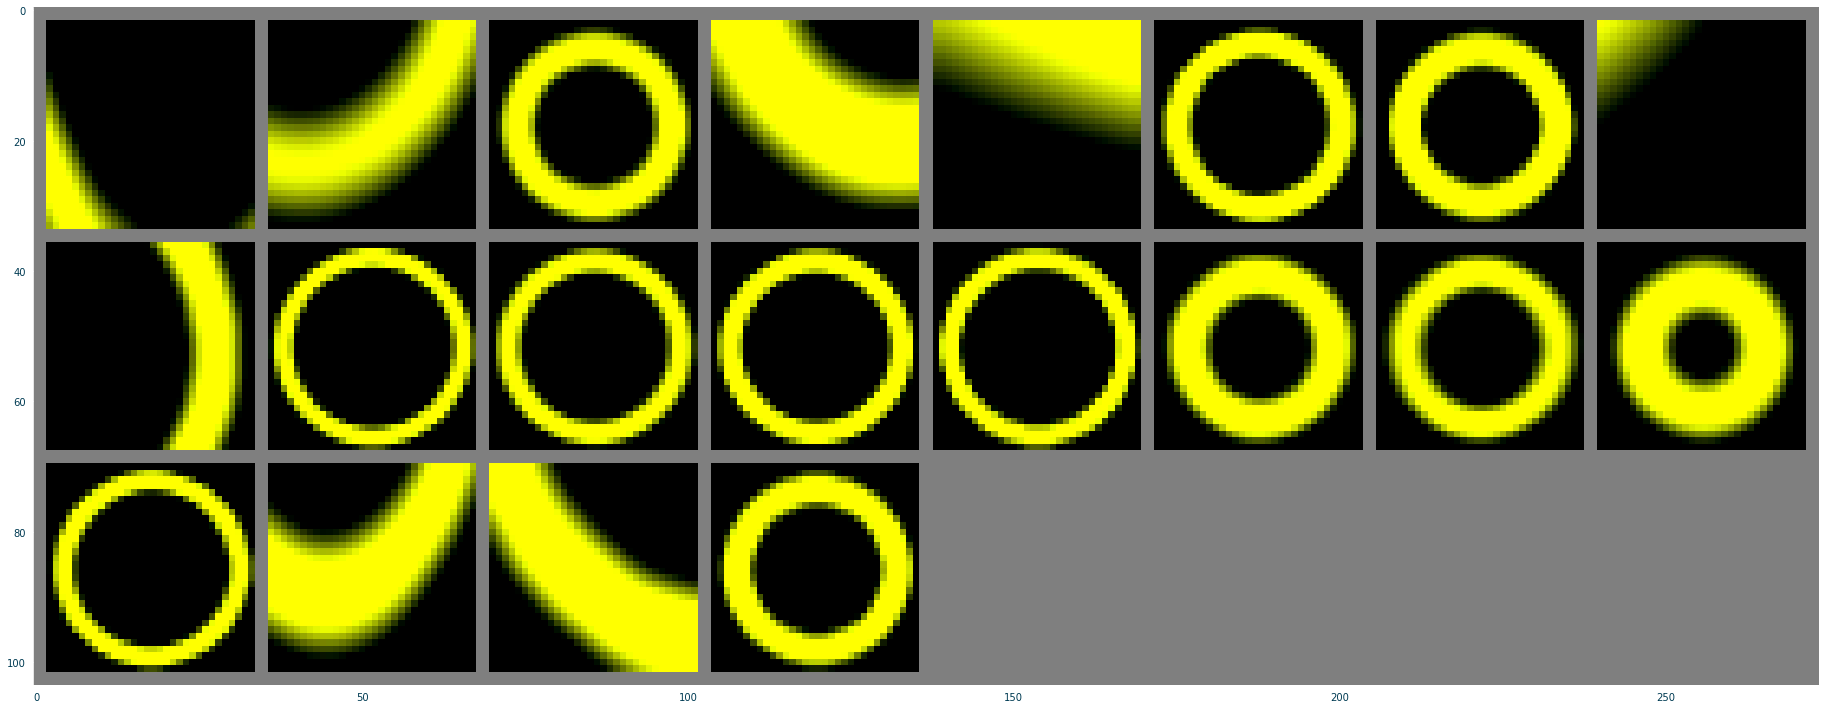

There are 320 images in the training set
There are 80 images in the test set
There are 16 batches in the train loader
There are 16 batches in the test loader
Let's train our model!


/home/nuls/.local/share/virtualenvs/bi_deep_learning-M-dGzlNK/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Train loss: [2.238628551363945, 1.2113036662340164, 0.7313282154500484, 0.6750821508467197, 0.5367138218134642, 0.3891620095819235, 0.18907273840159178, 0.13385956943966448, 0.17585734114982188, 0.0678553010802716, 0.05355997115839273, 0.052467157947830856, 0.04529623292910401, 0.039541138627100736, 0.035350488644326106, 0.03515939479984809, 0.022711970086675137, 0.02524528541835025, 0.020897097390843555, 0.01698260749617475]
Train accuracy: [28.4375, 55.9375, 60.9375, 71.25, 76.875, 83.4375, 94.6875, 95.0, 93.4375, 98.4375, 98.75, 98.75, 98.75, 98.75, 99.0625, 98.75, 99.375, 99.375, 99.375, 99.375]
Lets evaluate the tained model on the test set.
Predicted labels for batch 0: tensor([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
Actual labels for batch    0: tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



Predicted labels for batch 1: tensor([1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
Actual labels for batch    1: tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



Predicted labels for batch 2: tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
Actual labels for batch    2: tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



Predicted labels for batch 3: tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
Actual labels for batch    3: tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

Done.


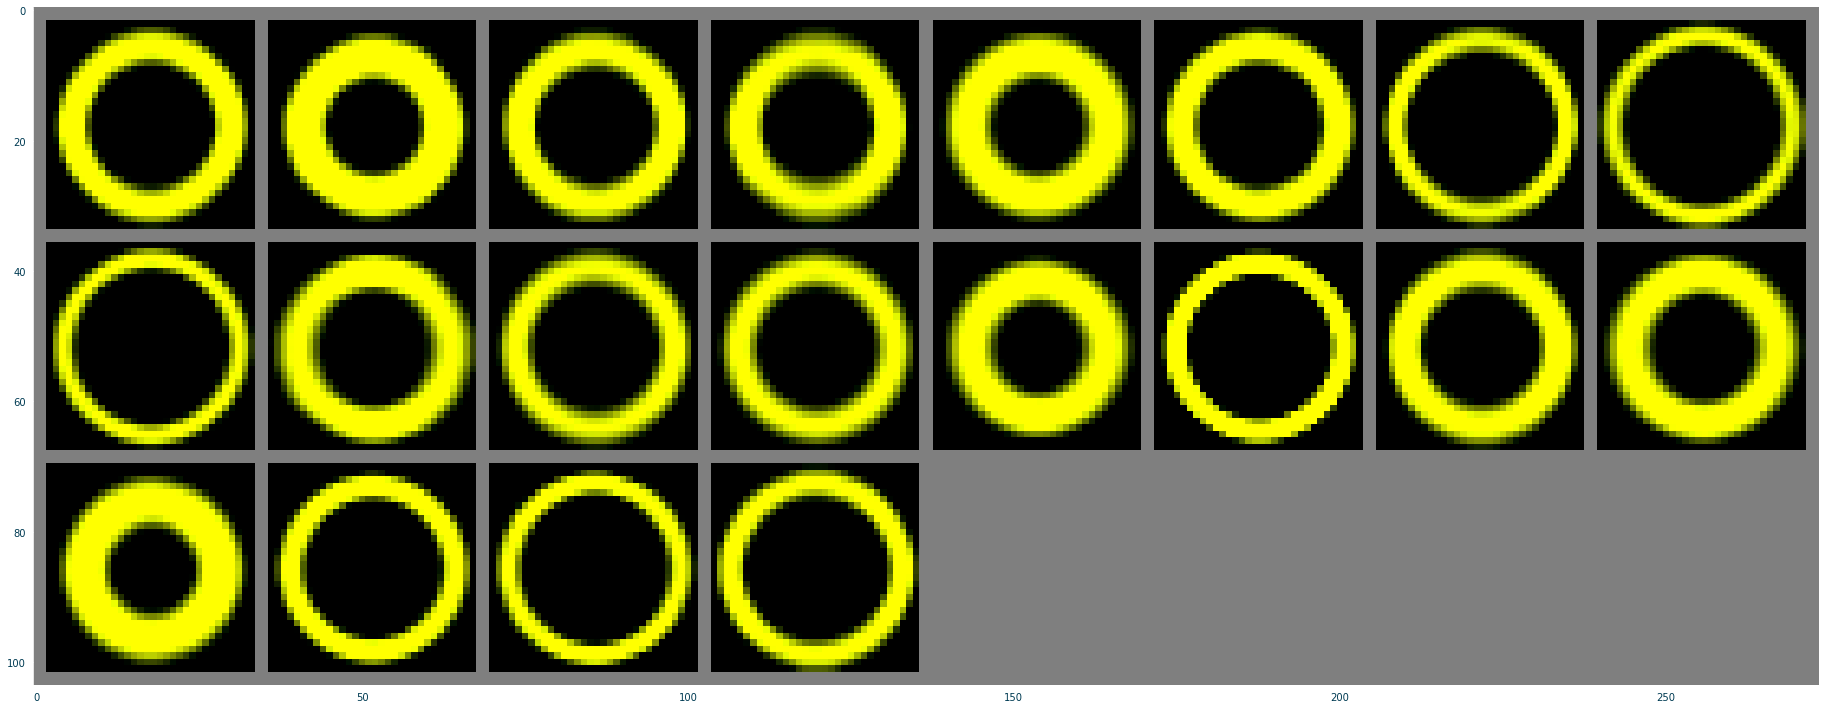

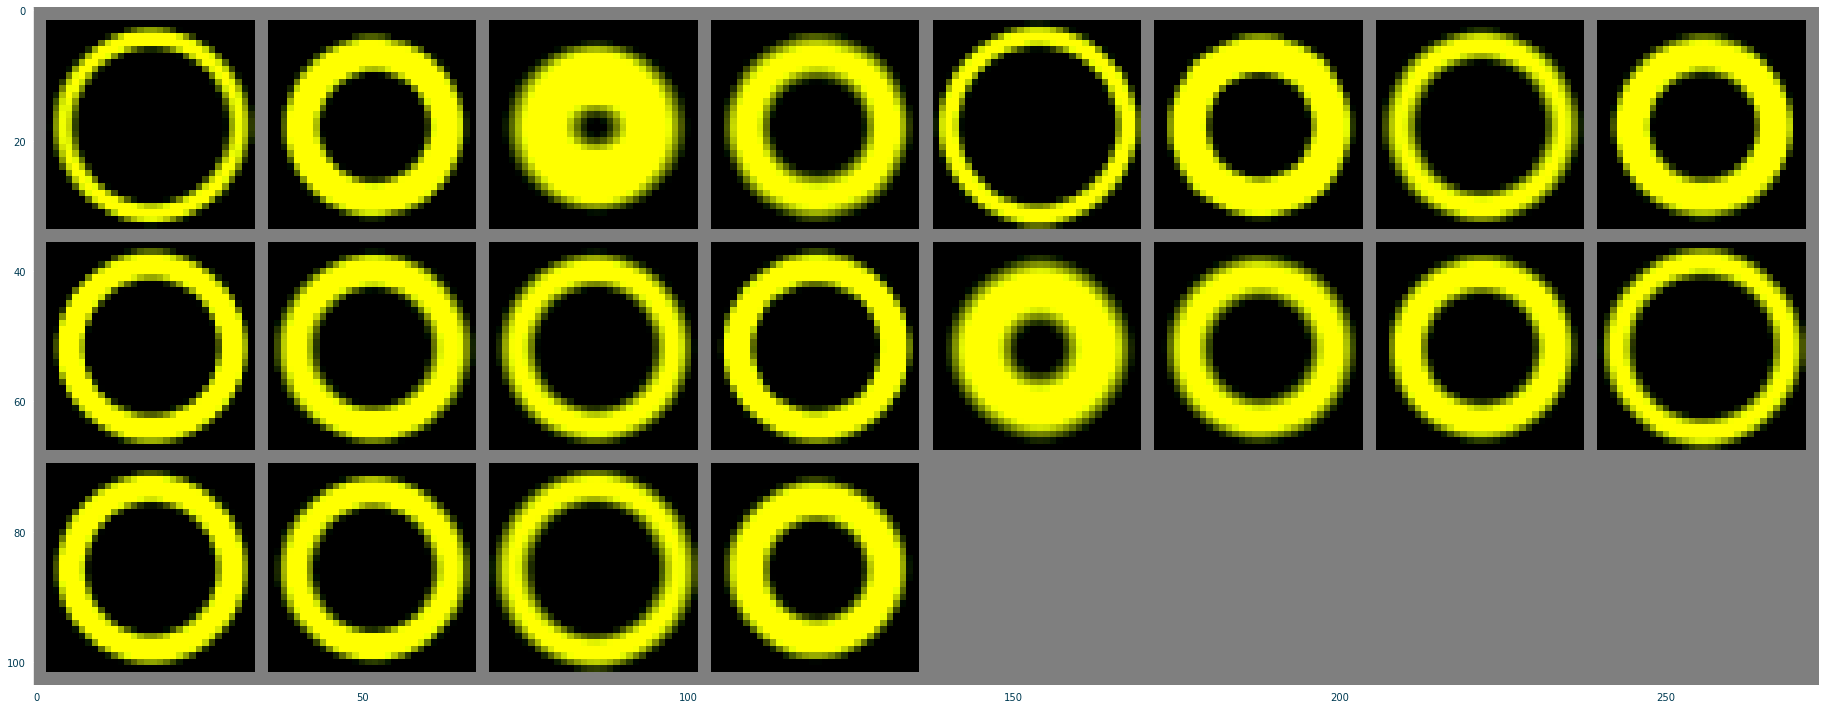

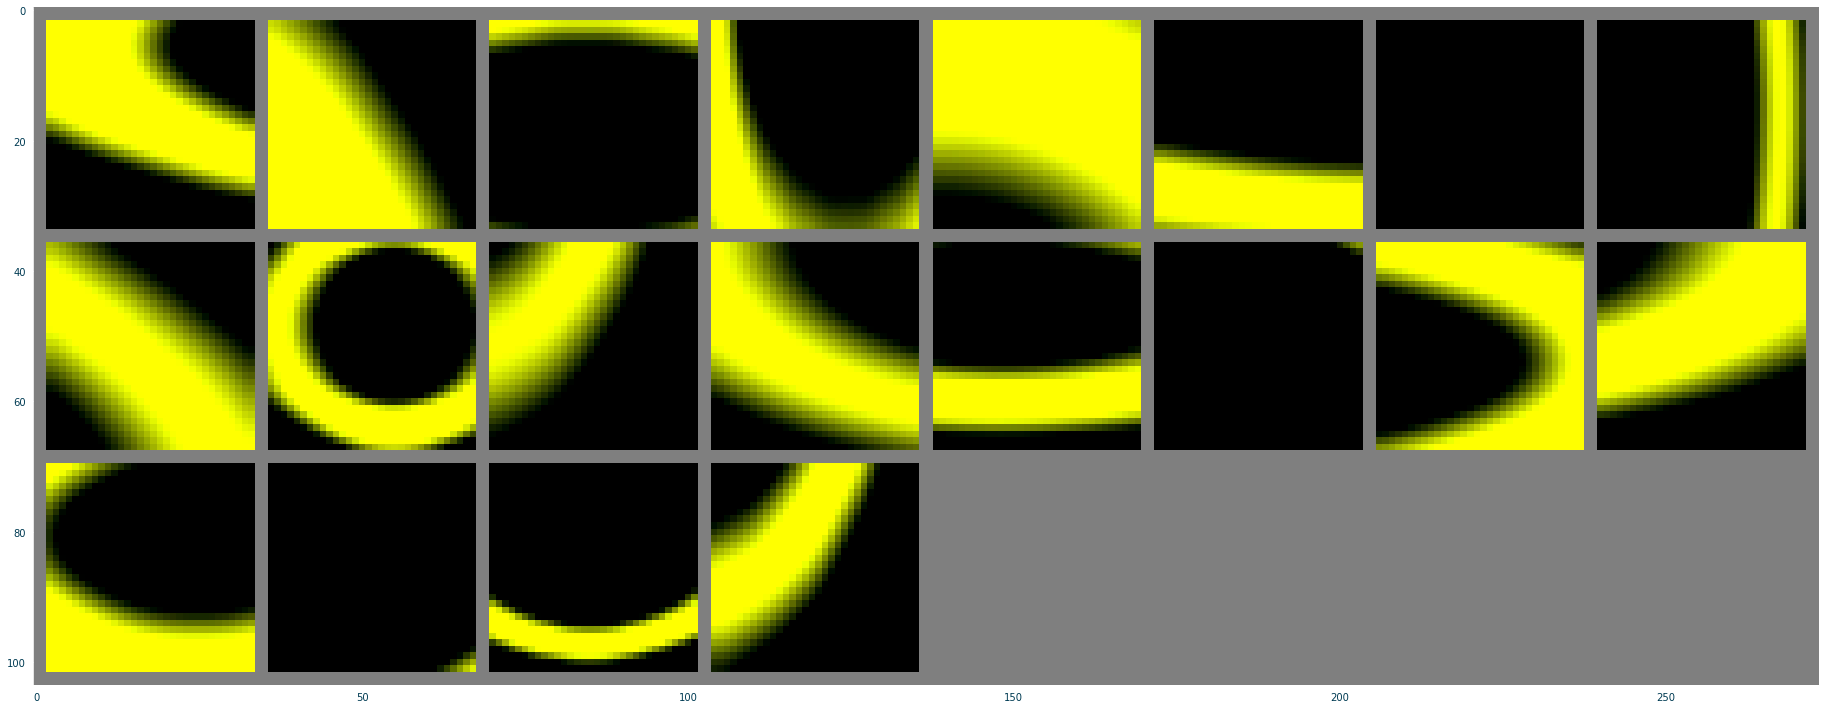

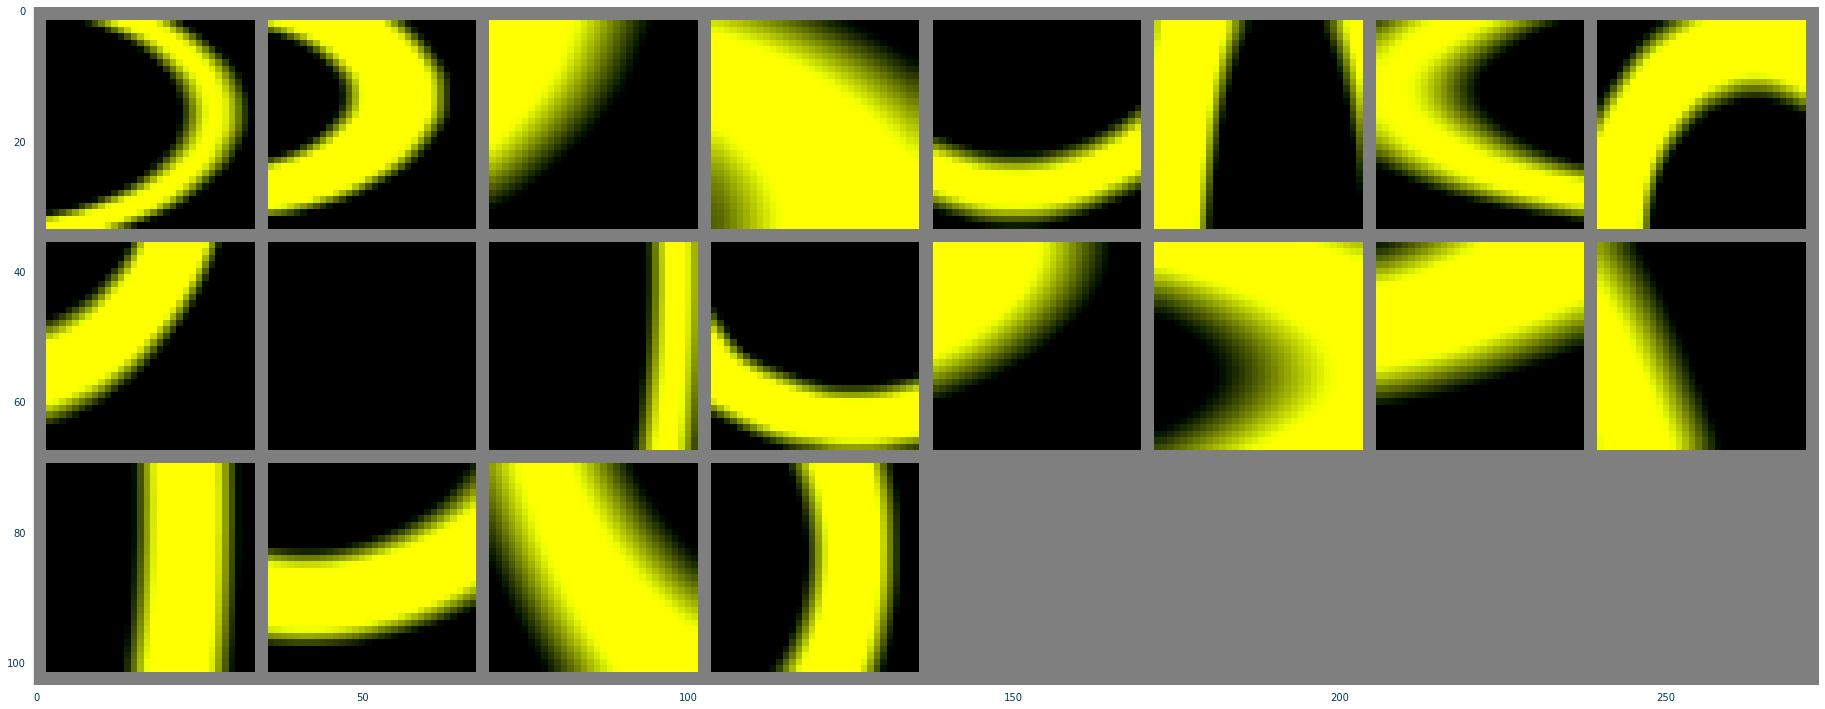

In [5]:
print("Training a CNN for classifying images that contain a circle.")

# Transformation for images
transform_ori = transforms.Compose([transforms.Resize(32),  # create 32x32 image
                                    # transforms.RandomHorizontalFlip(),  # flipping the image horizontally
                                    transforms.ToTensor(),  # convert the image to a Tensor
                                    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                            std=[0.229, 0.224, 0.225])])  # normalize the image

print("Prepare training and test set.")
# Load our dataset
train_dataset = datasets.ImageFolder(root='../images/classification/train',
                                        transform=transform_ori)

test_dataset = datasets.ImageFolder(root='../images/classification/test',
                                    transform=transform_ori)

# Make the dataset iterable
batch_size = 20
train_load = torch.utils.data.DataLoader(dataset=train_dataset,
                                            batch_size=batch_size,
                                            shuffle=True)

test_load = torch.utils.data.DataLoader(dataset=test_dataset,
                                        batch_size=batch_size,
                                        shuffle=False)


# Show a batch of images
# get some random training images
dataiter = iter(train_load)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))

print("There are {} images in the training set".format(len(train_dataset)))
print("There are {} images in the test set".format(len(test_dataset)))
print("There are {} batches in the train loader".format(len(train_load)))
print("There are {} batches in the test loader".format(len(train_load)))

# create the CNN
model = Net()

# loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# Define the lists to store the results of loss and accuracy
train_loss = []
test_loss = []
train_accuracy = []
test_accuracy = []

num_epochs = 20

print("Let's train our model!")
# Training
for epoch in range(num_epochs):
    # Reset these below variables to 0 at the begining of every epoch
    start = time.time()
    correct = 0
    iterations = 0
    iter_loss = 0.0

    model.train()  # Put the network into training mode

    for i, (inputs, labels) in enumerate(train_load):

        # Convert torch tensor to Variable
        inputs = Variable(inputs)
        labels = Variable(labels)

        optimizer.zero_grad()  # Clear off the gradient in (w = w - gradient)
        outputs = model(inputs)
        loss = loss_fn(outputs, labels)
        iter_loss += loss.item()  # Accumulate the loss
        loss.backward()  # Backpropagation
        optimizer.step()  # Update the weights

        # Record the correct predictions for training data
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum()
        iterations += 1

    # Record the training loss
    train_loss.append(iter_loss / iterations)
    # Record the training accuracy
    train_accuracy.append((100 * correct / len(train_dataset)))

print("Train loss: {}".format(train_loss))
print("Train accuracy: {}".format(list(map(lambda t: t.item(), train_accuracy))))


print("Lets evaluate the tained model on the test set.")

model.eval() # set model to eval mode

for i, (images, labels) in enumerate(test_load):
    out = model(images)
    _, predicted = torch.max(out, 1)

    print("Predicted labels for batch {}: {}".format(i, predicted))
    print("Actual labels for batch    {}: {}".format(i, labels))

    imshow(torchvision.utils.make_grid(images), file="result_{}.png".format(i))
    print("")

print("Done.")

### **Exercise 9.5.3: R-CNN**

In [7]:
import sys
import math
import time

import os
import json

import torch
from torch.utils.data import Dataset

from PIL import Image


import torch
from torch.utils.data import Dataset
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision import transforms as T
from torchvision.models.detection import fasterrcnn_resnet50_fpn

In [8]:

"""
This follows a pytorch tutorial:
https://pytorch.org/tutorials/intermediate/torchvision_tutorial.html#defining-the-dataset
"""


class CirclesDataSet(Dataset):

    def __init__(self, root="../images/full", transforms=None):

        self.root = root
        self.transforms = transforms
        self.imgs = list(sorted(os.listdir(self.root)))

        with open("../images/boxes.json") as fp:
            self.boxes = json.load(fp)

    def __getitem__(self, idx):
        # load images and boxes
        img_path = os.path.join(self.root, self.imgs[idx])
        img = Image.open(img_path).convert("RGB")

        num_objs = 1  # currently only one circle in the image
        boxes = [self.boxes[self.imgs[idx]]]

        # convert everything into a torch.Tensor
        boxes = torch.as_tensor(boxes, dtype=torch.float32)

        # there is only one class
        labels = torch.ones((num_objs,), dtype=torch.int64)
        image_id = torch.tensor([idx])
        area = (boxes[:, 3] - boxes[:, 1]) * (boxes[:, 2] - boxes[:, 0])

        # suppose all instances are not crowd
        iscrowd = torch.zeros((num_objs,), dtype=torch.int64)

        target = dict()
        target["boxes"] = boxes
        target["labels"] = labels
        target["image_id"] = image_id
        target["area"] = area
        target["iscrowd"] = iscrowd

        if self.transforms is not None:
            img = self.transforms(img)

        return img, target

    def __len__(self):
        return len(self.imgs)

In [9]:
def get_model_instance_segmentation(num_classes):
    # load a model pre-trained pre-trained on COCO
    model = fasterrcnn_resnet50_fpn(pretrained=True)

    # replace the classifier with a new one, that has
    # num_classes which is user-defined
    num_classes = 2  # 1 class (person) + background
    # get number of input features for the classifier
    in_features = model.roi_heads.box_predictor.cls_score.in_features
    # replace the pre-trained head with a new one
    model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

    return model

In [11]:
def get_transform():
    # not that this is only applied to the image!!!
    # if some resizing is happening, the targets have to be resized as well!
    transforms = list()
    transforms.append(T.ToTensor())

    return T.Compose(transforms)


In [12]:
def collate_fn(batch):
    return tuple(zip(*batch))

In [13]:
def train_one_epoch(model, optimizer, data_loader, device, epoch, print_freq):
    model.train()

    header = 'Epoch: [{}]'.format(epoch)
    print(header)

    for i, (images, targets) in enumerate(data_loader):
        t0 = time.time()

        images = list(images)
        targets = list(targets)
        loss_dict = model(images, targets)

        losses = sum(loss for loss in loss_dict.values())
        loss_value = losses.item()

        if not math.isfinite(loss_value):
            print("Loss is {}, stopping training".format(loss_value))
            print(loss_dict)
            sys.exit(1)

        optimizer.zero_grad()
        losses.backward()
        optimizer.step()

        print("Processed mini {} in {}. Current loss is {}.".format(i,
                                                                    round(time.time() - t0, 2),
                                                                    round(loss_value, 5)))

In [14]:
# train on CPU
device = torch.device('cpu')

# our dataset has two classes only - background and person
num_classes = 2
# use our dataset and defined transformations
dataset = CirclesDataSet(root='../images/full', transforms=get_transform())
dataset_test = CirclesDataSet(root='../images/full', transforms=get_transform())

# take only a few samples, otherwise it takes to long
indices = range(len(dataset))
end = int(len(dataset)*0.05)
dataset = torch.utils.data.Subset(dataset, indices[:end])

# define training and validation data loaders
data_loader = torch.utils.data.DataLoader(
    dataset, batch_size=2, shuffle=True, collate_fn=collate_fn)

# get the model using our helper function
model = get_model_instance_segmentation(num_classes)

# move model to the right device
model.to(device)

# construct an optimizer
params = [p for p in model.parameters() if p.requires_grad]
optimizer = torch.optim.SGD(params, lr=0.005,
                            momentum=0.9, weight_decay=0.0005)
# and a learning rate scheduler
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer,
                                                step_size=3,
                                                gamma=0.1)

# let's train it for 2 epochs. that might not be enough but takes already quite long
num_epochs = 2

for epoch in range(num_epochs):
    # train for one epoch, printing every 10 iterations
    train_one_epoch(model, optimizer, data_loader, device, epoch, print_freq=10)
    # update the learning rate
    lr_scheduler.step()

# save model
model_path = "rcnn_model.pth"
torch.save(model.state_dict(), model_path)

print("Model trained an save in {}.".format(model_path))

Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /home/nuls/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth


  0%|          | 0.00/160M [00:00<?, ?B/s]

Epoch: [0]
Processed mini 0 in 10.87. Current loss is 1.35236.
Processed mini 1 in 14.09. Current loss is 0.38164.
Processed mini 2 in 14.44. Current loss is 0.30411.
Processed mini 3 in 13.1. Current loss is 0.34273.
Processed mini 4 in 13.45. Current loss is 0.33627.
Epoch: [1]
Processed mini 0 in 14.12. Current loss is 0.23414.
Processed mini 1 in 12.13. Current loss is 0.27287.
Processed mini 2 in 12.27. Current loss is 0.2638.
Processed mini 3 in 12.43. Current loss is 0.23156.
Processed mini 4 in 11.94. Current loss is 0.23747.
Model trained an save in rcnn_model.pth.


In [15]:
import sys
import os
import time

import torch
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torchvision.models.detection.faster_rcnn import model_urls
from torchvision import transforms as T

from PIL import Image
from PIL.ImageDraw import Draw
from matplotlib import pyplot as plt
import numpy as np

model_urls["fasterrcnn_resnet50_fpn_coco"] = model_urls["fasterrcnn_resnet50_fpn_coco"].replace("https://", "http://")

In [16]:
def get_transform():
    # not that this is only applied to the image!!!
    # if some resizing is happening, the targets have to be resized as well!
    transforms = list()
    transforms.append(T.ToTensor())

    return T.Compose(transforms)

In [17]:
def collate_fn(batch):
    return tuple(zip(*batch))


def draw_boxes(image, boxes):
    draw = Draw(image)
    for box in boxes:
        draw.rectangle(xy=box)


def get_model_instance_segmentation(num_classes):
    # load a model pre-trained pre-trained on COCO
    model = fasterrcnn_resnet50_fpn(pretrained=False)

    # replace the classifier with a new one, that has
    # num_classes which is user-defined
    num_classes = 2  # 1 class (person) + background
    # get number of input features for the classifier
    in_features = model.roi_heads.box_predictor.cls_score.in_features
    # replace the pre-trained head with a new one
    model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

    return model

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /home/nuls/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

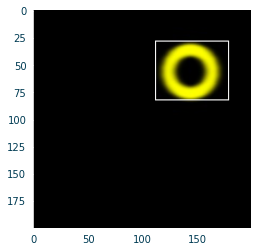

Detected objects in image in 1.72 seconds.


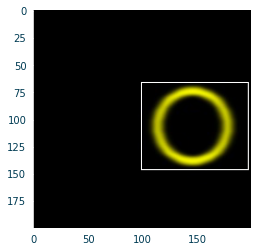

Detected objects in image in 1.83 seconds.


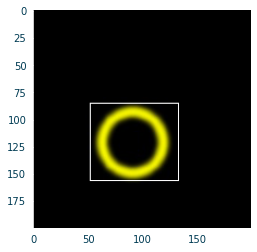

Detected objects in image in 1.89 seconds.


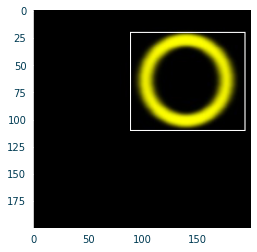

Detected objects in image in 1.79 seconds.


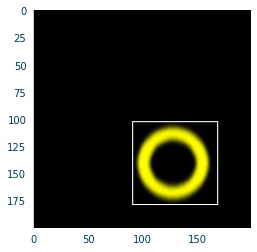

Detected objects in image in 1.83 seconds.


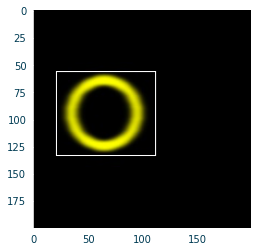

Detected objects in image in 1.8 seconds.


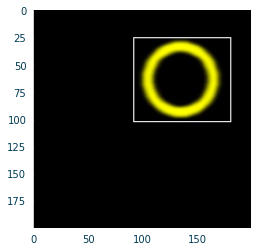

Detected objects in image in 1.9 seconds.


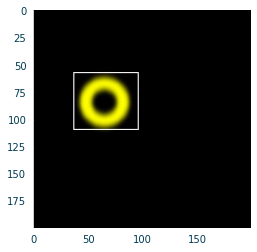

Detected objects in image in 1.96 seconds.


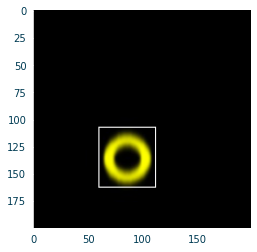

Detected objects in image in 2.31 seconds.


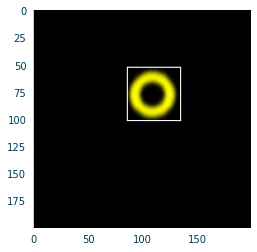

Detected objects in image in 2.42 seconds.
Done.


In [18]:
model_path = "rcnn_model.pth"

model = get_model_instance_segmentation(2)
model.load_state_dict(torch.load(model_path))
model.eval()

dataset_test = CirclesDataSet(root='../images/full', transforms=get_transform())
indices = range(len(dataset_test))
dataset_test = torch.utils.data.Subset(dataset_test, indices[0:10])

data_loader_test = torch.utils.data.DataLoader(
    dataset_test, batch_size=1, shuffle=True, collate_fn=collate_fn)

for i, (images, targets) in enumerate(data_loader_test):
    t0 = time.time()

    images = list(images)
    targets = list(targets)

    pred_target = model(images, targets)[0]

    boxes = pred_target["boxes"][0:1].detach().numpy()

    image = T.ToPILImage()(images[0])

    draw_boxes(image, boxes)
    # image.save("predicted_{}.png".format(i))
    plt.imshow(np.asarray(image))
    plt.show()

    print("Detected objects in image in {} seconds.".format(round(time.time() - t0, 2)))

print("Done.")